# Montecarlo Demo

Kate Meldrum

** All non-project requirements are marked like this

In [26]:
from montecarlo import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Senario 1: 2-Sided Coin

We create a fair coin and one unfair coin, both coins have faces 'H' and 'T' and the unfair coin has a head weight of 5:

In [27]:
fair = die(['H','T'])
unfair = die(['H','T'])
unfair.change_weight('H', 5)
print("Fair Coin:\n", fair.display())
print(" \n Unfair Coin:\n", unfair.display())

Fair Coin:
        Weight
Faces        
H         1.0
T         1.0
 
 Unfair Coin:
        Weight
Faces        
H         5.0
T         1.0


We play two games of 1000 flips of all coins involved. The fair game is played with three fair dice, and the unfair game is played with two unfair dice and one fair die. The resulting rolls are displayed below:

In [28]:
fairgame = game([fair,fair, fair])
unfairgame = game([unfair,unfair, fair])
fairgame.play(1000)
unfairgame.play(1000)
print("Fair Game: \n", fairgame.show_rolls())
print("\n Unfair Game: \n", unfairgame.show_rolls())

Fair Game: 
      Die 1 Die 2 Die 3
1        H     H     T
2        H     H     H
3        H     T     H
4        T     T     T
5        H     H     T
...    ...   ...   ...
996      H     H     H
997      T     H     H
998      T     T     H
999      T     T     T
1000     T     T     H

[1000 rows x 3 columns]

 Unfair Game: 
      Die 1 Die 2 Die 3
1        H     H     T
2        H     T     H
3        H     H     H
4        T     H     H
5        H     H     H
...    ...   ...   ...
996      H     H     H
997      H     H     T
998      H     T     T
999      T     H     H
1000     T     H     T

[1000 rows x 3 columns]


We now analyze this game by finding the number of jackpots for each game and calculating realative frequency of a jackpot roll:

In [29]:
fairan = analyzer(fairgame)
unfairan = analyzer(unfairgame)
fj = fairan.jackpot()
uj = unfairan.jackpot()
print("Fair game jackpots: ", fj);
print("Unfair game jackpots: ", uj);

Fair game jackpots:  237
Unfair game jackpots:  310


In [30]:
print("Relative frequency of fair game jackpots: ", fj/1000)
print("Relative frequency of unfair game jackpots: ", uj/1000)

Relative frequency of fair game jackpots:  0.237
Relative frequency of unfair game jackpots:  0.31


We plot these results:

In [31]:
import matplotlib.pyplot as plot

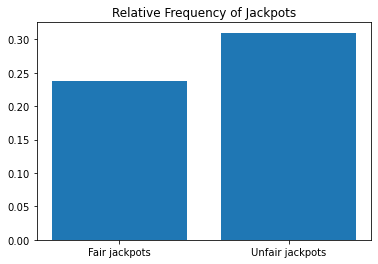

In [32]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

## Senario 2:

For this senario we create 3 standard 6-sided dice, 'fair' is weighted fairly, 'unfair1' is weighted towards 6 by a factor of 5, and 'unfair2' is weighted towards 1 by a factor of 5. The weights of each die are displayed below:

In [33]:
fair = die([1,2,3,4,5,6])
unfair1 = die([1,2,3,4,5,6])
unfair1.change_weight(6, 5)
unfair2 = die([1,2,3,4,5,6])
unfair2.change_weight(1,5)
print("Fair: \n", fair.display())
print("\n Unfair1: \n ", unfair1.display())
print("\n Unfair2: \n ", unfair2.display())

Fair: 
        Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0

 Unfair1: 
         Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         5.0

 Unfair2: 
         Weight
Faces        
1         5.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0


Next we use these dice to play two games: a fair game with 6 fiar dice, and an unfair game with two unfair1s, one unfair2, and two fair dice. We both sets of dice 10000 times:

In [34]:
fairgame=game([fair, fair, fair, fair, fair])
fairgame.play(10000)
print("Fair game: \n", fairgame.show_rolls(wide = True))

Fair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          6      3      4      6      2
2          3      5      4      3      3
3          6      2      6      2      6
4          5      3      3      6      4
5          2      4      3      4      5
...      ...    ...    ...    ...    ...
9996       4      6      6      1      4
9997       4      6      4      1      1
9998       5      1      1      1      4
9999       5      1      6      2      6
10000      6      6      1      5      2

[10000 rows x 5 columns]


In [35]:
unfairgame=game([unfair1, unfair1, unfair2, fair, fair])
unfairgame.play(10000)
print("Unfair game: \n", unfairgame.show_rolls())

Unfair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          4      6      1      6      2
2          6      6      1      6      6
3          5      6      3      5      3
4          1      3      1      3      5
5          1      2      1      1      1
...      ...    ...    ...    ...    ...
9996       6      6      4      1      5
9997       6      1      6      1      2
9998       6      6      4      4      6
9999       5      2      4      1      1
10000      6      6      1      4      2

[10000 rows x 5 columns]


We again analyze the relative frequency of jackpots of the two games:

In [36]:
fairanalyzer = analyzer(fairgame)
unfairanalyzer = analyzer(unfairgame)

In [37]:
fj = fairanalyzer.jackpot()
print("Relative frequency of fair game jackpots:", fj/10000)

Relative frequency of fair game jackpots: 0.0011


In [38]:
uj = unfairanalyzer.jackpot()
print("Relative frequency of unfair game jackpots:", uj/10000)

Relative frequency of unfair game jackpots: 0.0007


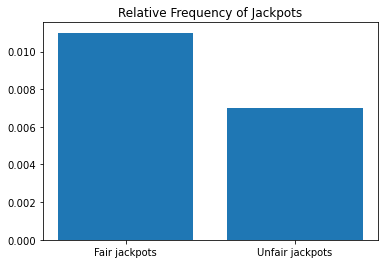

In [39]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

**We can use the combo and sequence functions to produce multi-index representations of the frequency of each roll combination or roll sequence:

In [40]:
print("Fair game: \n", fairanalyzer.combo(), fairanalyzer.sequence())
print("Unfair game: \n", unfairanalyzer.combo(), unfairanalyzer.sequence())

Fair game: 
            Frequency
0 1 2 3 4           
1 2 3 5 6        175
      4 6        173
2 3 4 5 6        161
1 2 4 5 6        158
  3 4 5 6        147
...              ...
2 2 2 2 2          2
4 4 4 4 4          2
3 3 3 3 3          2
5 5 5 5 5          1
1 1 1 1 1          1

[252 rows x 1 columns]                                Frequency
Die 1 Die 2 Die 3 Die 4 Die 5           
6     6     1     1     1              8
3     6     4     1     2              6
1     1     1     1     4              6
5     5     2     2     6              6
3     5     2     5     3              6
...                                  ...
4     5     1     2     4              1
2     3     5     4     6              1
4     5     1     2     6              1
                  3     3              1
1     1     1     1     1              1

[5624 rows x 1 columns]
Unfair game: 
            Frequency
0 1 2 3 4           
1 2 4 6 6        205
  4 5 6 6        198
  3 4 5 6        196
      6 6   

We can also use the combo function to display the most frequent combinations with a string index that can be easily graphed:

In [41]:
ftt=fairanalyzer.combo(freq = True).head(10)
utt=unfairanalyzer.combo(freq = True).head(10)
print('Most frequent fair game rolls: \n', ftt)
print('\n Most frequent unfair game rolls: \n', utt)

Most frequent fair game rolls: 
                                                        Roll #s Total Frequency
Combination                                                                   
12356        [10, 77, 145, 276, 366, 437, 561, 625, 647, 72...             175
12346        [17, 84, 94, 108, 109, 147, 162, 207, 214, 252...             173
23456        [52, 151, 177, 179, 271, 279, 308, 325, 362, 4...             161
12456        [99, 188, 260, 446, 458, 488, 564, 811, 887, 9...             158
13456        [32, 236, 254, 352, 359, 377, 391, 475, 532, 6...             147
12345        [114, 144, 168, 184, 186, 306, 335, 368, 373, ...             146
12245        [135, 255, 275, 480, 524, 604, 693, 731, 930, ...              96
11245        [137, 157, 443, 559, 590, 609, 696, 702, 875, ...              96
12355        [256, 307, 369, 517, 540, 575, 855, 872, 1432,...              90
24556        [182, 212, 219, 381, 438, 514, 763, 771, 867, ...              87

 Most frequent unf

Fair Die:


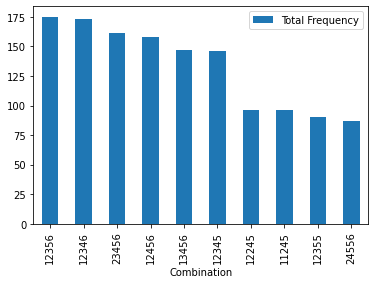

In [42]:
print('Fair Die:')
ftt.plot.bar();


Unfair Die:


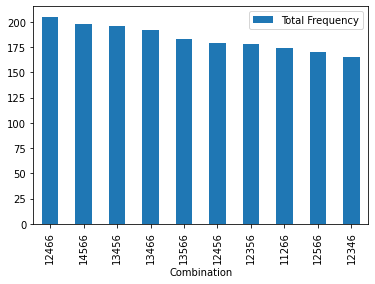

In [43]:
print('Unfair Die:')
utt.plot.bar();

## Senario 3: Alphabet Dice

For this senario we create a die with 26 faces containing the letters of the alphabet and we weight the faces according to each letter's frequency of usage in the english language. These faces and weights are displayed below:

In [44]:
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
die = die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [45]:
freq = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]
for i in range(0,26):
    die.change_weight(alpha[i], freq[i])
die.display()

,Weight
Faces,
a,8.4966
b,2.0720
c,4.5388
d,3.3844
e,11.1607
f,1.8121
g,2.4705
h,3.0034
i,7.5448


We can use this die format to play a game where 5 alphabet dice are rolled 1000 times:

In [46]:
game = game([die,die,die,die,die])
game.play(1000)
df = game.show_rolls()
df 

,Die 1,Die 2,Die 3,Die 4,Die 5
1,t,b,s,u,c
2,a,i,e,n,a
3,i,r,s,y,m
4,g,i,t,l,l
5,a,e,t,i,m
...,...,...,...,...,...
996,s,t,t,t,i
997,l,k,u,d,r
998,l,a,g,g,h
999,r,c,t,d,e


**We can represent these rolls as counts of each possible face per roll using the counts function:

In [47]:
analyzer1 = analyzer(game)
pd.set_option('display.max_columns', None)
analyzer1.counts()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0
997,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
998,1,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


We can analyze this by iterating through each row and comparing it to the official list of 5 letter scrabble words:

In [48]:
rolls_lst = []
for i in range(len(df)):   
    rolls_lst.append(''.join(list(df.iloc[i,:])))

In [49]:
from scrab import scrab_words_5l
real_words = []
for roll in rolls_lst:
    if roll in scrab_words_5l:
        real_words.append(roll)
print(real_words)

['loose', 'viers', 'tills']


Now that we have found how many real words were created we can find the relative frequency of real words created by rolling 5 alphabet dice:

In [50]:
print("Relative Frequency: ", len(real_words)/1000)

Relative Frequency:  0.003
